# Q2-Q5

In [4]:
import numpy as np
X=np.array([[1,0],[0,1],[0,-1],[-1,0],[0,2],[0,-2],[-2,0]])
Y=np.array([-1,-1,-1,1,1,1,1])
#Q2
X1 = X[:,0]
X2 = X[:,1]
def kernel1(A,B):
    return B*B-2*A+3,A*A-2*B-3
Z1,Z2 = kernel1(X1,X2)
print(Z1,Z2)
Z=np.stack((Z1,Z2)).T
print(Z)
Op1 = np.where(Z1-4.5>0,1,-1)
Res1 = np.where(Op1==Y,1,0)



[1 4 4 5 7 7 7] [-2 -5 -1 -2 -7  1  1]
[[ 1 -2]
 [ 4 -5]
 [ 4 -1]
 [ 5 -2]
 [ 7 -7]
 [ 7  1]
 [ 7  1]]


In [31]:
#Q3
from sklearn import svm 
# C very large equals to hard svm
clf = svm.SVC(kernel='poly',degree=2,coef0=1,gamma=1,C=1e10,shrinking=False)
clf.fit(X,Y)
print(clf.support_)
print(clf.dual_coef_)
res = np.sum(Y[clf.support_]*clf.dual_coef_[0])
print(res)


[1 2 3 4 5]
[[-0.64491963 -0.76220325  0.88870349  0.22988879  0.2885306 ]]
2.814245753050456


In [33]:
#Q4
b=clf.intercept_[0]
b

-1.6663314053609206

# Q15-Q20

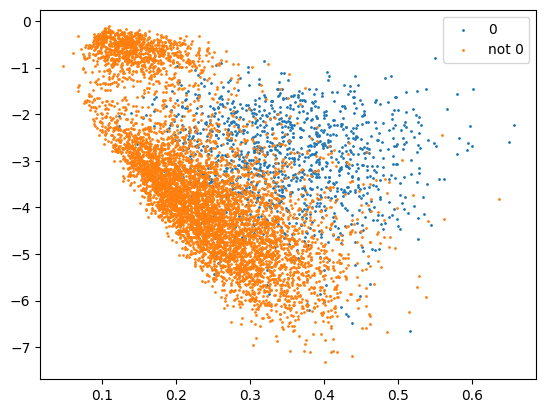

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
#-----------data reading-----------#
data_train = np.loadtxt('features_train.npz')
data_test = np.loadtxt('features_test.dat')
Y_train,X_train=data_train[:,0],data_train[:,1:]
Y_test,X_test = data_test[: ,0],data_test[:,1:]
#-----------data ploting-----------#
plt.scatter(X_train[Y_train==0][:,0],X_train[Y_train==0][:,1],s=1,label='0')
plt.scatter(X_train[Y_train!=0][:,0],X_train[Y_train!=0][:,1],s=1,label='not 0')
plt.legend()
plt.show()


In [23]:
Y_train1 = np.where(Y_train==0,1,-1)
# model training
clf = svm.SVC(kernel='linear',C=0.01)
clf.fit(X_train,Y_train1)
w=np.array(clf.coef_)
print(w)


[[0.57072734 0.02595359]]


In [27]:
Y_choice = [0,2,4,6,8]
Ein = []
sigma_a = []
for i in Y_choice:
    Y_train1 = np.where(Y_train==i,1,-1)
    clf = svm.SVC(kernel='poly',degree=2,coef0=1,C=0.01)
    clf.fit(X_train,Y_train1)
    Res = np.where(clf.predict(X_train)==Y_train1,0,1)
    mean_res =Res.mean()
    Ein.append(mean_res)
    
    support = clf.support_
    coef = np.sum(clf.dual_coef_[0]*Y_train1[support]) #clf给出的系数是Σyn*an,要再乘一个yn变回1
    sigma_a.append(coef)
sigma_a



[23.880000000000003, 14.619999999999997, 13.04, 13.279999999999998, 10.84]

In [31]:
C_choice = [0.001,0.01,0.1,1,10]
w=[]
deltan=[]
sv_number=[]
Eout = []
for i in C_choice:
    Y_train1 = np.where(Y_train==0,1,-1)
    clf=svm.SVC(kernel='rbf',gamma=100,C=i)
    clf.fit(X_train,Y_train1)
    eout = np.where(clf.predict(X_test)!= np.where(Y_test==0,1,-1),1,0)
    Eout.append(eout.mean())
Eout



[0.17887394120577976,
 0.17887394120577976,
 0.10513203786746388,
 0.10363726955655207,
 0.10463378176382661]

In [32]:
gamma_choice = [1,10,100,1000,10000]
Eout = []
for i in gamma_choice:
    Y_train1 = np.where(Y_train==0,1,-1)
    clf=svm.SVC(kernel='rbf',gamma=i,C=0.1)
    clf.fit(X_train,Y_train1)
    eout = np.where(clf.predict(X_test)!= np.where(Y_test==0,1,-1),1,0)
    Eout.append(eout.mean())
Eout

[0.10712506228201295,
 0.09915296462381665,
 0.10513203786746388,
 0.17887394120577976,
 0.17887394120577976]